In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lnazr\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lnazr\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\lnazr\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
human=pd.read_table('human_data.txt')
human

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [3]:
len(human)

4380

In [4]:
#Function to convert sequence words into k-mer strings =6(hexamer)
def Kmer(sequence,size=6):
    return [sequence[x:x+size].lower() for x in range (0,len(sequence)-size+1)]

In [5]:
# human['words']=''
# for i in range (len(human)):
#     human['words'][i]=Kmer(human['sequence'][i])
    
    

In [6]:
human['words'] = human.apply(lambda x: Kmer(x['sequence']), axis=1)
human = human.drop('sequence', axis=1)

In [7]:
#human.drop('sequence',axis=1)

In [8]:
human_text=list(human['words'])
for x in range (len(human_text)):
    human_text[x]=' '.join(human_text[x])
y=human.iloc[:,0]

In [9]:
print(human_text[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

<h2>Applying Bag of words using CountVectorizer using NLP</h2>

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words=None, ngram_range=(4,4), analyzer='word')
X=cv.fit_transform(human_text)

<AxesSubplot:>

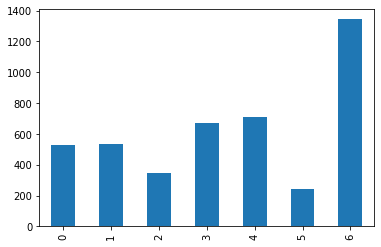

In [18]:
#checking if its a balanced dataset
human['class'].value_counts().plot.bar()

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.20)

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=0.1)


In [21]:
nb.fit(Xtrain,ytrain)

MultinomialNB(alpha=0.1)

In [22]:
pred=nb.predict(xtest)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(ytest,pred)
acc

0.9840182648401826